In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv('airlines_flights_data.csv',delimiter=',')


In [3]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.drop(columns='index',inplace=True)

In [8]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df['airline'].value_counts(normalize=True)*100

airline
Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: proportion, dtype: float64

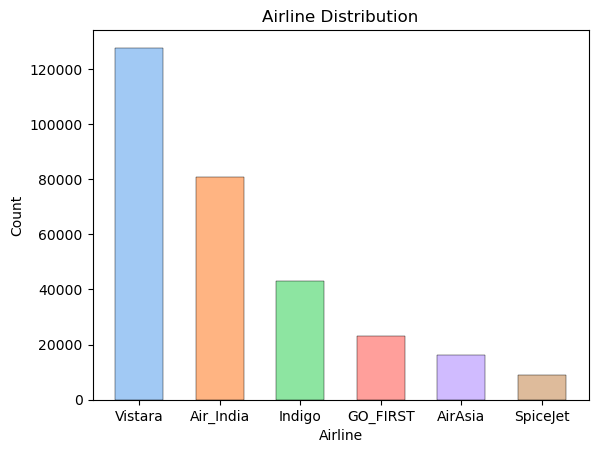

In [10]:
categories = df['airline'].value_counts().index
counts = df['airline'].value_counts()
colors = sns.color_palette('pastel')

plt.bar(categories, counts,
        align = 'center',
        width = 0.6,
        color = colors,
        edgecolor = 'black',
        linewidth = 0.3,

       )

plt.title('Airline Distribution')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

        

In [11]:
df['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [12]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

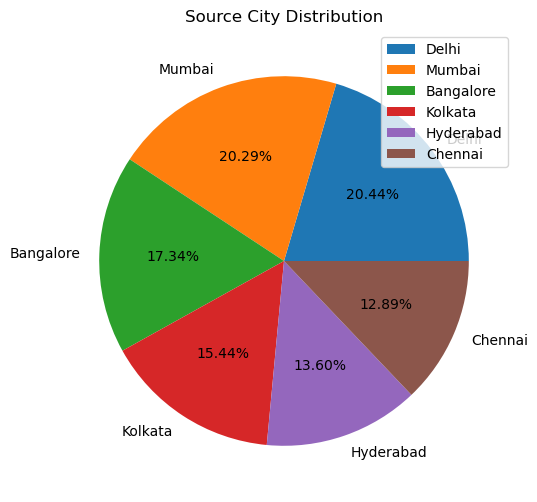

In [13]:
plt.figure(figsize=(10,6))
plt.pie(x=df['source_city'].value_counts(), labels=df['source_city'].value_counts().index, autopct="%1.2f%%", explode=[0,0,0,0,0,0])
plt.title('Source City Distribution')
plt.legend()

plt.show()

In [14]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

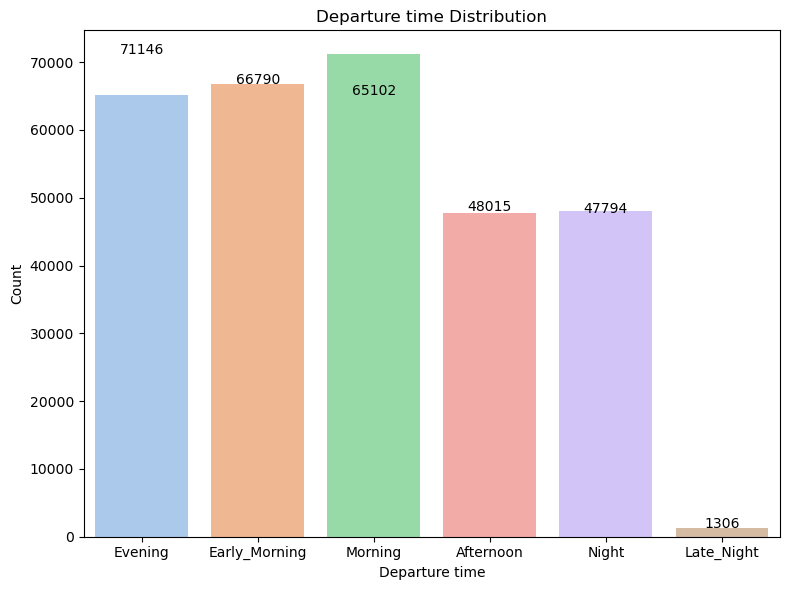

In [15]:
Groups = df['departure_time'].value_counts()
plt.figure(figsize=(8, 6))

sns.countplot(data=df, hue='departure_time', x='departure_time', palette='pastel', legend=False)

plt.title('Departure time Distribution')
plt.xlabel('Departure time')
plt.ylabel('Count')

for i in range(len(Groups)):
    plt.text(i, Groups.iloc[i], Groups.iloc[i], ha='center')

plt.tight_layout()
plt.show()

In [16]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

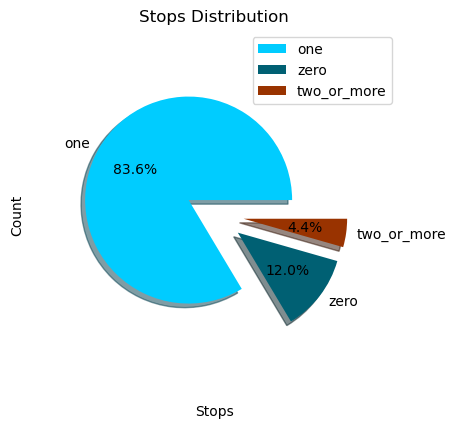

In [17]:
categories = df['stops'].value_counts().index
counts = df['stops'].value_counts()

plt.pie(
    counts,
    labels=categories,
    colors=[
        '#00ccff', '#006073', '#993300',
        '#ff3385', '#660033', '#00ace6'  
    ],
    explode=[0.2, 0.2, 0.2],
    autopct='%2.1f%%',
    shadow=True,
    radius=0.7
)

plt.title('Stops Distribution')
plt.xlabel('Stops')
plt.ylabel('Count')
plt.legend()
plt.show()


In [18]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

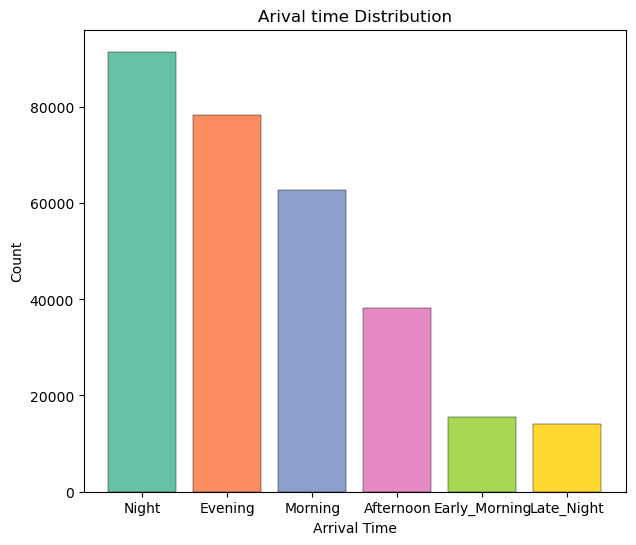

In [19]:
categories = df['arrival_time'].value_counts().index
counts = df['arrival_time'].value_counts()
colors  = sns.color_palette('Set2')

plt.figure(figsize=(7,6))
plt.bar(categories, counts,
        align='center',
        width=0.8,
        color=colors,
        edgecolor='black',
        linewidth=0.3,
)

plt.title('Arival time Distribution')
plt.xlabel('Arrival Time')
plt.ylabel('Count')
plt.show()


In [20]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

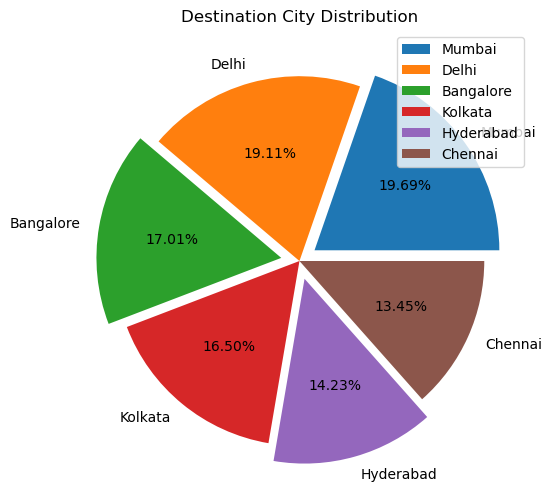

In [21]:
plt.figure(figsize=(10, 6))
plt.pie(x=df['destination_city'].value_counts(), labels=df['destination_city'].value_counts().index, autopct="%1.2f%%",explode=[0.1,0,0.1,0,0.1,0])
plt.title('Destination City Distribution')
plt.legend()

plt.show()

In [22]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

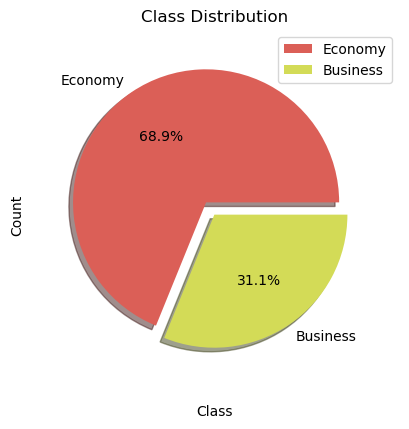

In [23]:
categories = df['class'].value_counts().index
counts = df['class'].value_counts()

plt.pie(counts,
        labels=categories,
        colors=sns.color_palette('hls'),
        explode=[0.1, 0],
        autopct='%1.1f%%',
        shadow=True,
        radius=0.9,
       )

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()


In [24]:
df['days_left'].value_counts()

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

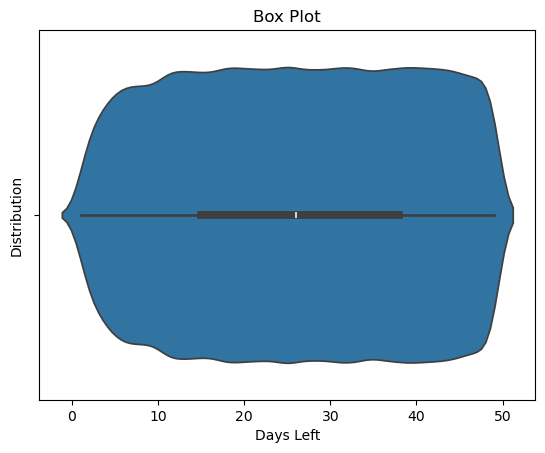

In [25]:
sns.violinplot(data=df['days_left'], orient='h')
plt.title('Box Plot')
plt.xlabel('Days Left')
plt.ylabel('Distribution')
plt.show()

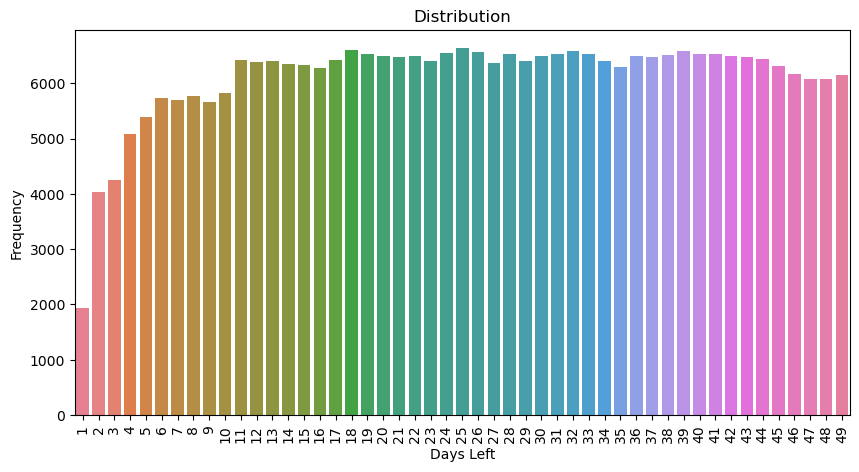

In [26]:
df['days_left_str'] = df['days_left'].astype(str)

unique_days = df['days_left_str'].nunique()
colors = sns.color_palette('husl', unique_days)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='days_left_str', hue='days_left_str', palette=colors, legend=False)

plt.title('Distribution')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [27]:
df['duration'].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

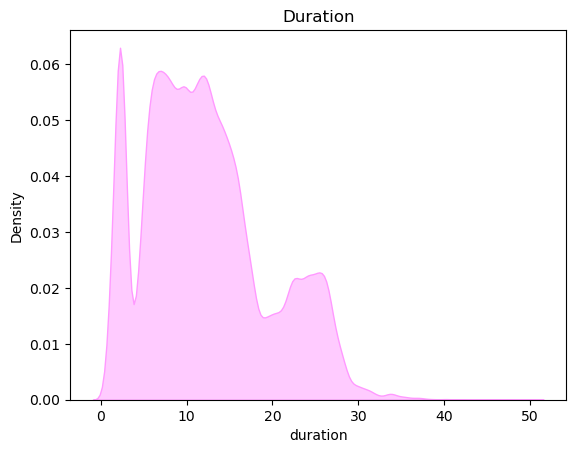

In [28]:
sns.kdeplot(df['duration'],color='#ff99ff',fill=True,alpha=0.5)
plt.title('Duration')
plt.show()

In [29]:
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

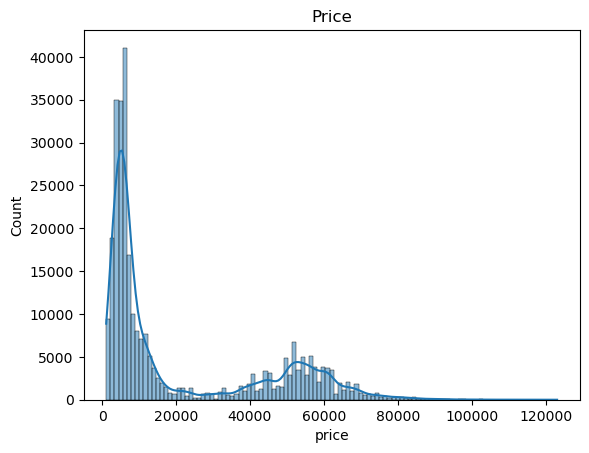

In [30]:
sns.histplot(df['price'],kde=True)
plt.title('Price')
plt.show()

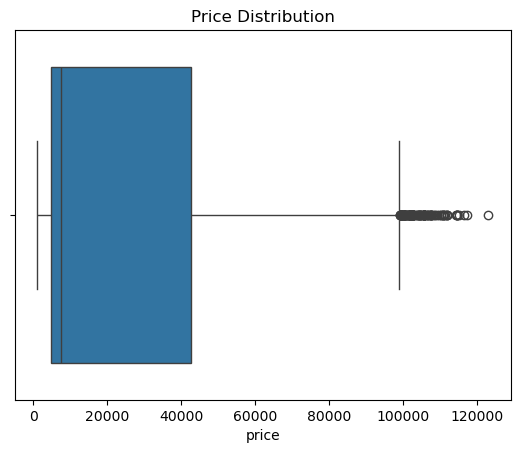

In [31]:
sns.boxplot(x=df['price'])
plt.title('Price Distribution')
plt.show()

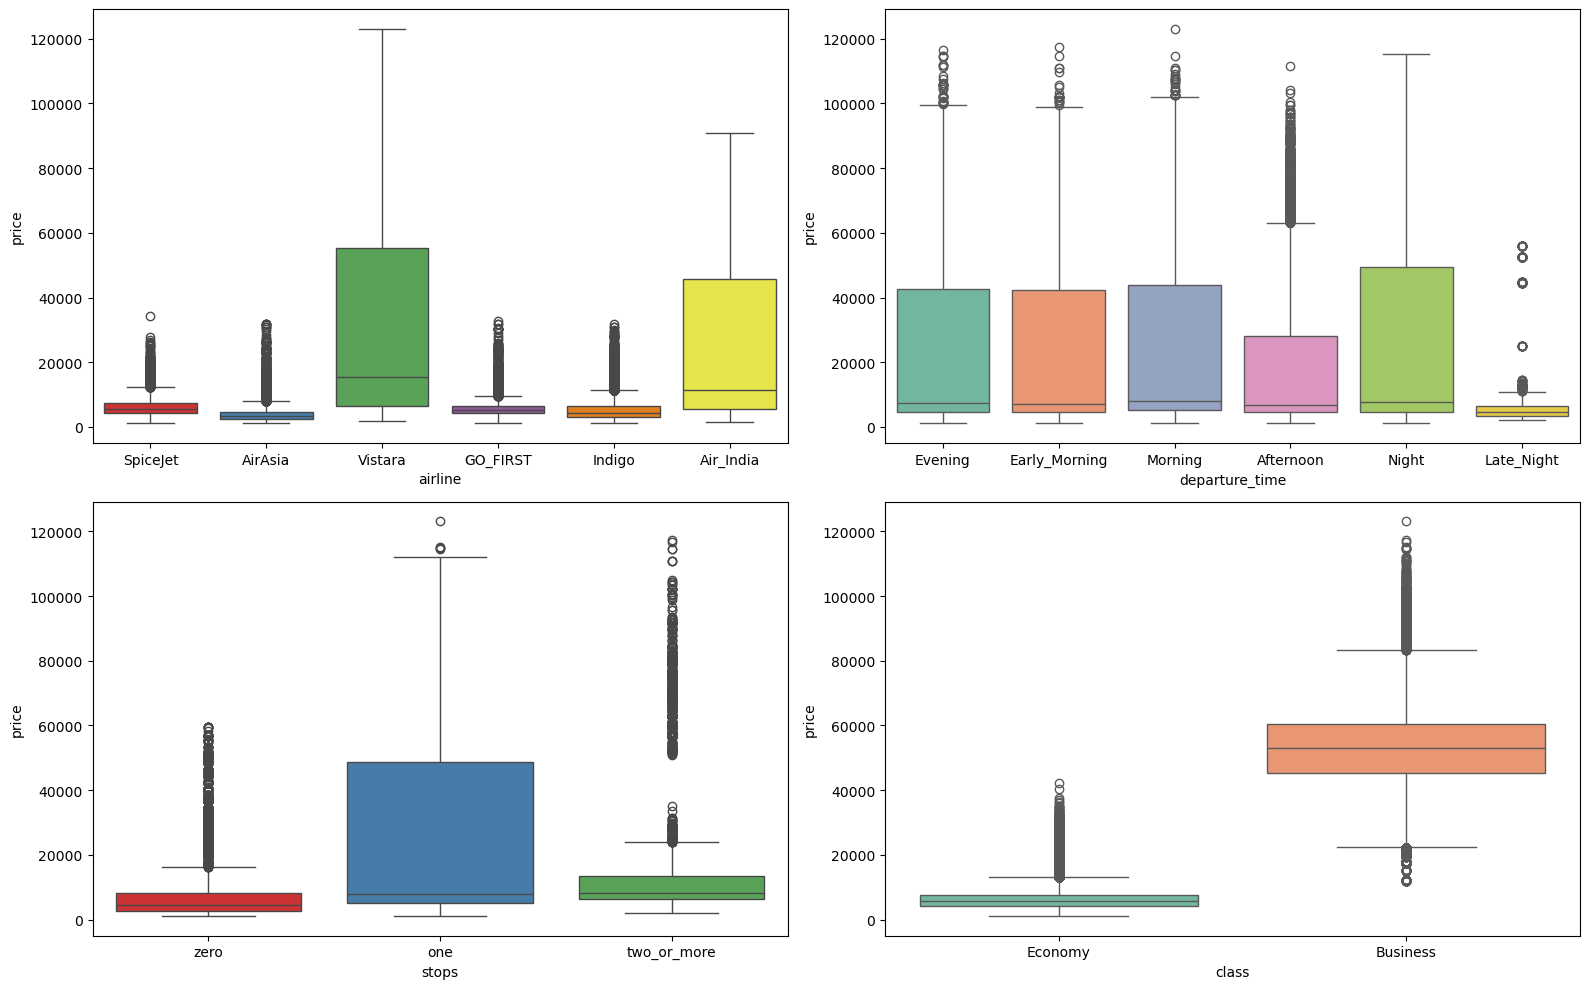

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.boxplot(ax=axes[0, 0], x='airline', y='price', data= df, hue='airline', palette='Set1', legend=False)
sns.boxplot(ax=axes[0, 1], x='departure_time', y='price', data=df, hue='departure_time', palette='Set2', legend=False)
sns.boxplot(ax=axes[1, 0], x='stops', y='price', data=df, hue='stops', palette='Set1', legend=False)
sns.boxplot(ax=axes[1, 1], x='class', y='price', data=df, hue='class', palette='Set2', legend=False)

plt.tight_layout()
plt.show()

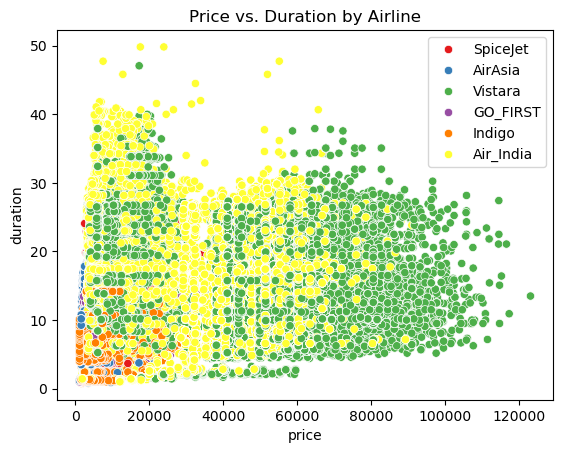

In [33]:
sns.scatterplot(x='price', y='duration', data=df, hue='airline', palette='Set1')
plt.title('Price vs. Duration by Airline')
plt.legend(loc='upper right')
plt.show()

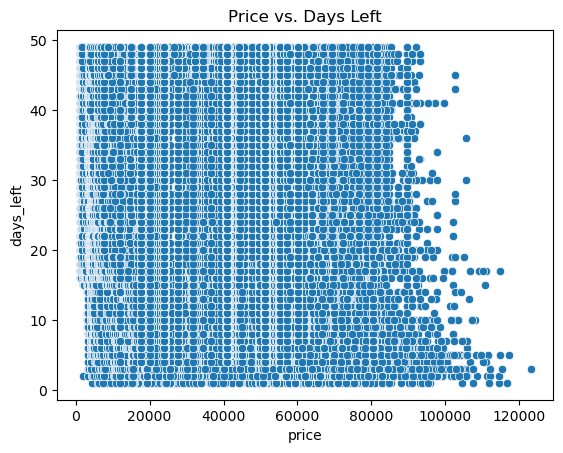

In [34]:
sns.scatterplot(x='price', y='days_left', data=df)
plt.title('Price vs. Days Left')
plt.show()

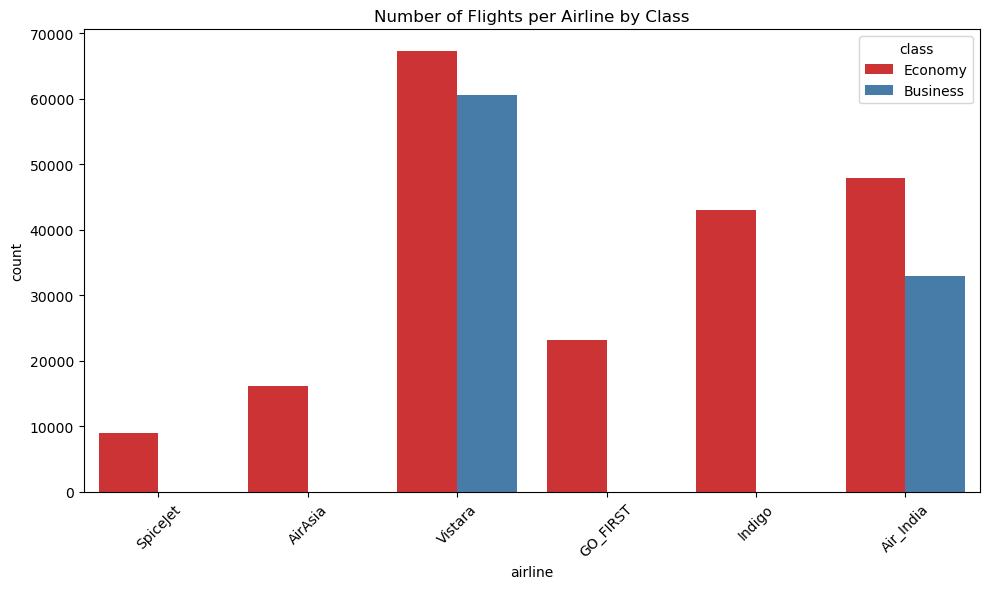

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='airline', hue='class', data=df, palette='Set1')
plt.title('Number of Flights per Airline by Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

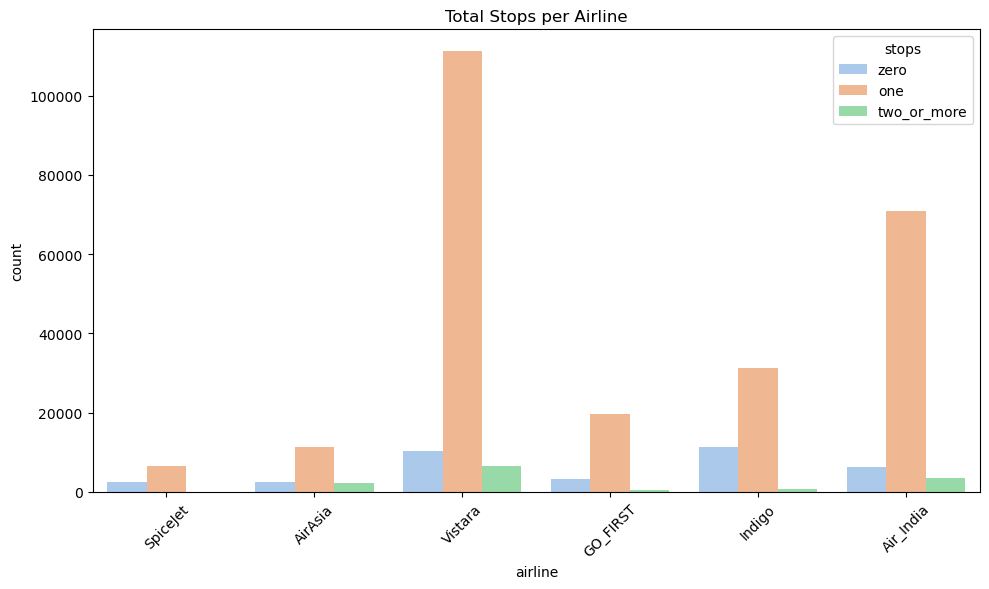

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='stops', data=df, palette='pastel')
plt.title('Total Stops per Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

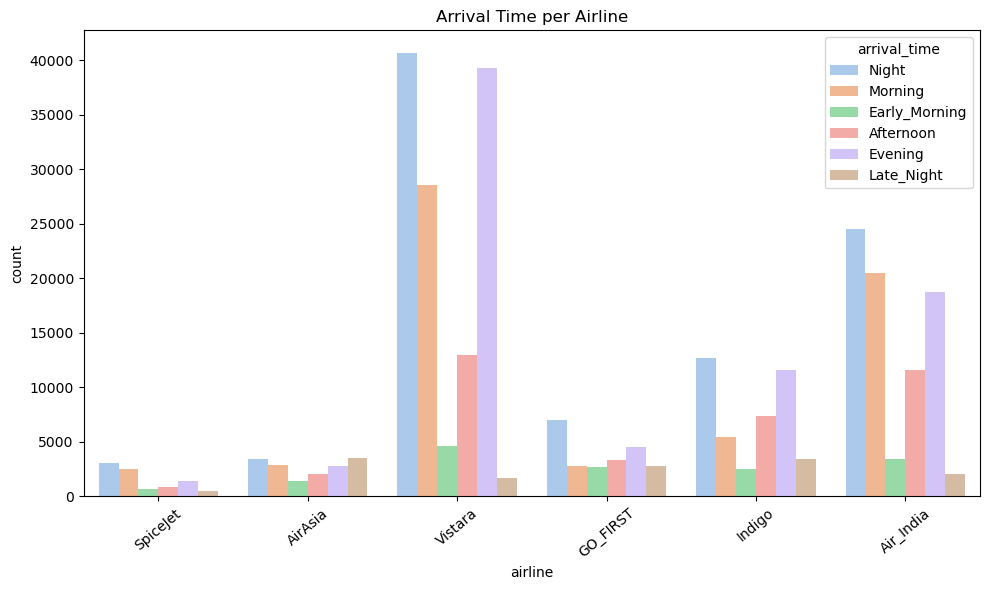

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='arrival_time', data=df, palette='pastel')
plt.title('Arrival Time per Airline')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


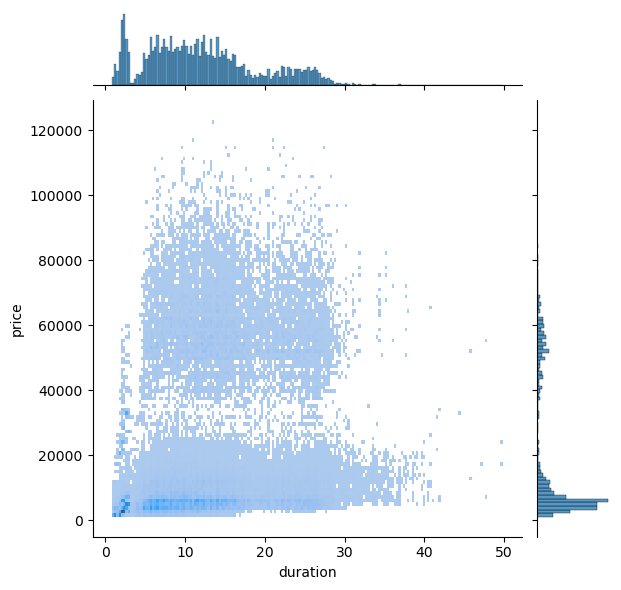

In [38]:
sns.jointplot(data=df, x='duration', y='price', kind='hist')
plt.title('Jointplot of Duration vs Price', y=1.02)
plt.show()

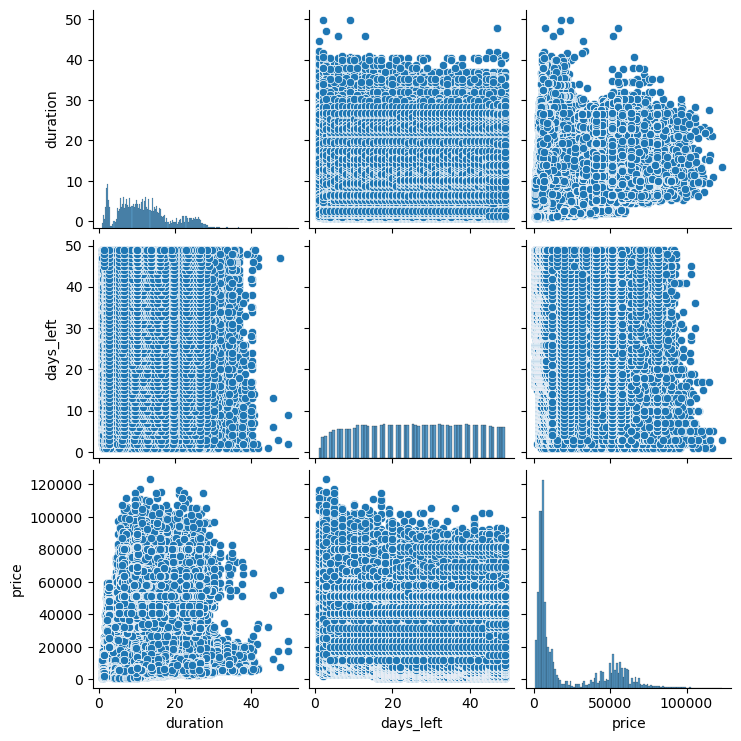

In [39]:
sns.pairplot(df)
plt.show()

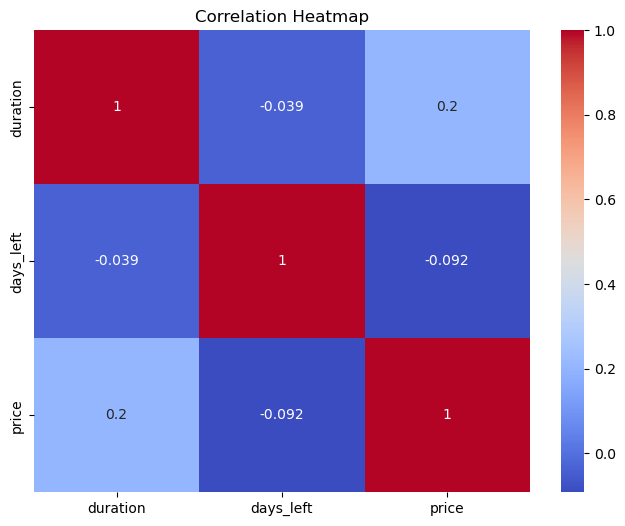

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

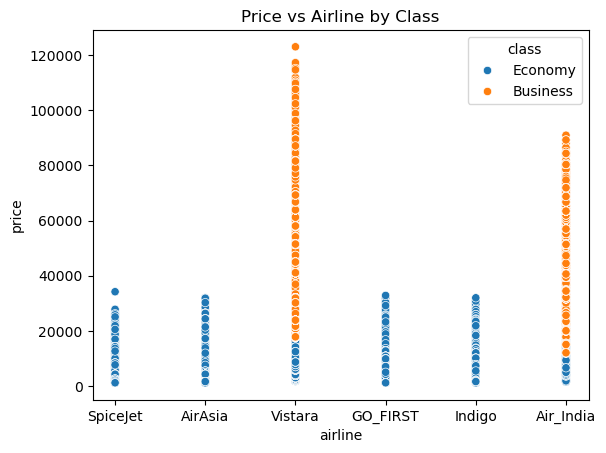

In [41]:
sns.scatterplot(data=df, x='airline', y='price', hue='class')
plt.title('Price vs Airline by Class')
plt.show()

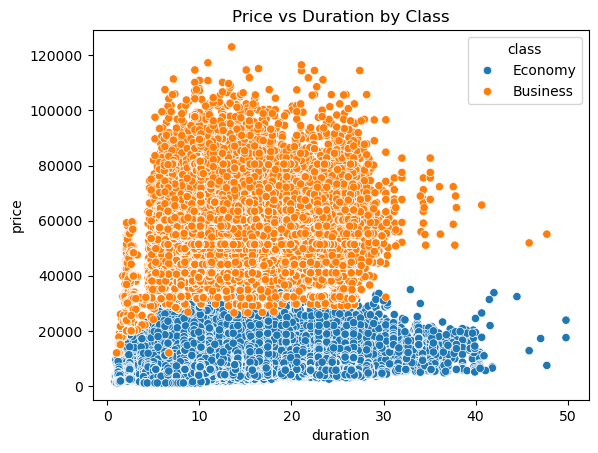

In [42]:
sns.scatterplot(data=df, x='duration', y='price', hue='class')
plt.title('Price vs Duration by Class')
plt.show()

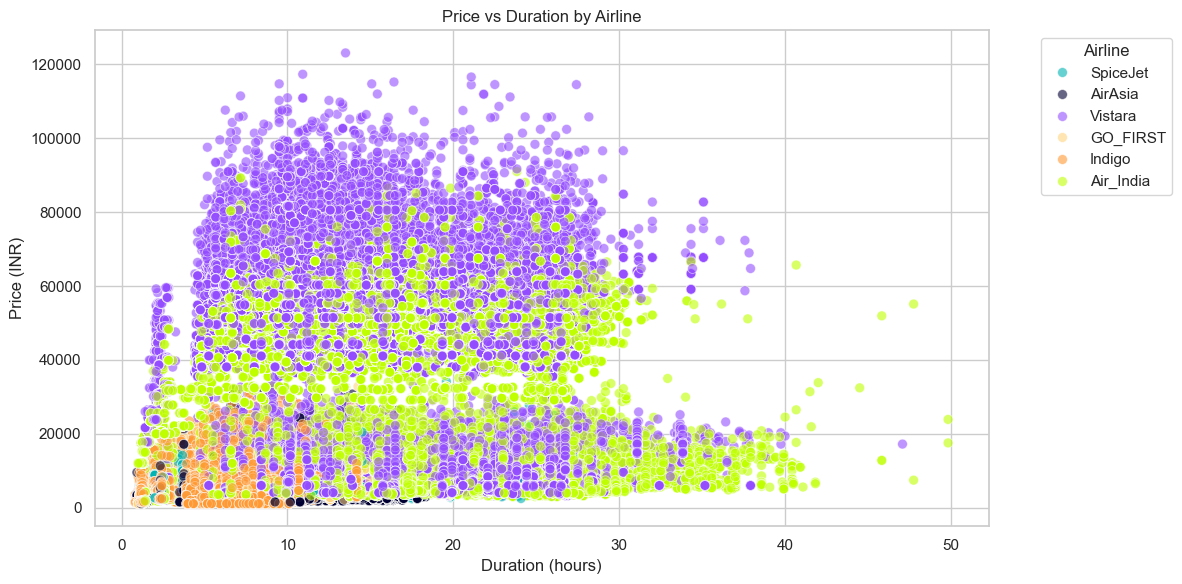

In [43]:
sns.set(style='whitegrid')
palette={
    'SpiceJet': '#00b3b3',
    'AirAsia': '#000033',
    'Vistara': '#944dff',
    'GO_FIRST': '#ffd480',
    'Indigo': '#ff9933',
    'Air_India': '#bfff00',
}

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='duration',
    y='price',
    hue='airline',
    palette=palette,
    alpha=0.6,
    s=50
)

plt.title('Price vs Duration by Airline')
plt.xlabel('Duration (hours)')
plt.ylabel('Price (INR)')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



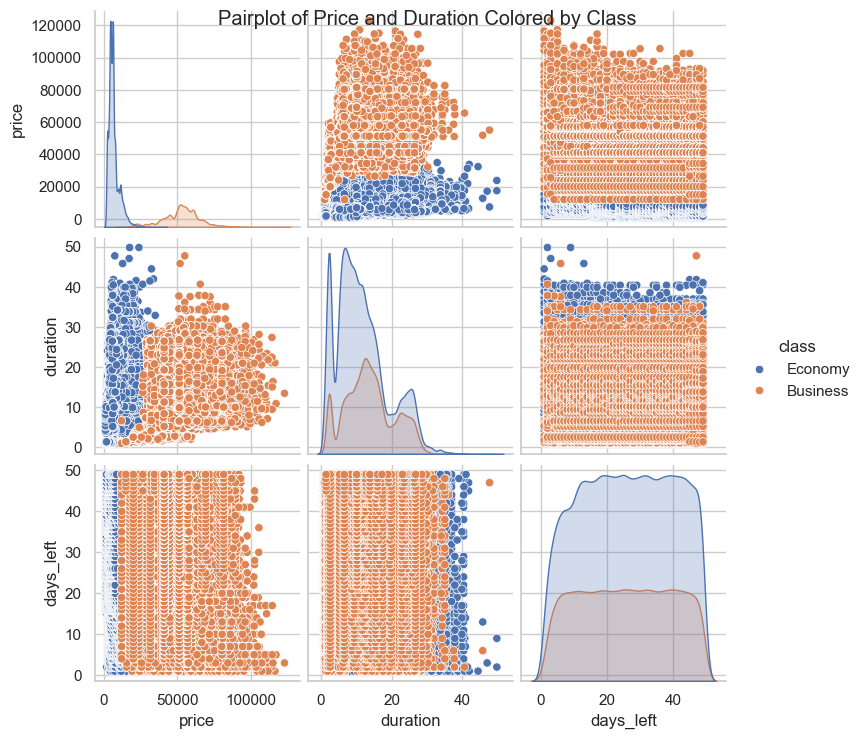

In [50]:
sns.pairplot(df, vars=['price', 'duration','days_left'], hue='class')
plt.suptitle("Pairplot of Price and Duration Colored by Class")
plt.show()

In [51]:
corr_matrix = df.corr(numeric_only=True)

corr_matrix

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [53]:
price_corr = corr_matrix['price'].sort_values(ascending=False)

print("Correlation with Price:\n")
print(price_corr)


Correlation with Price:

price        1.000000
duration     0.204222
days_left   -0.091949
Name: price, dtype: float64


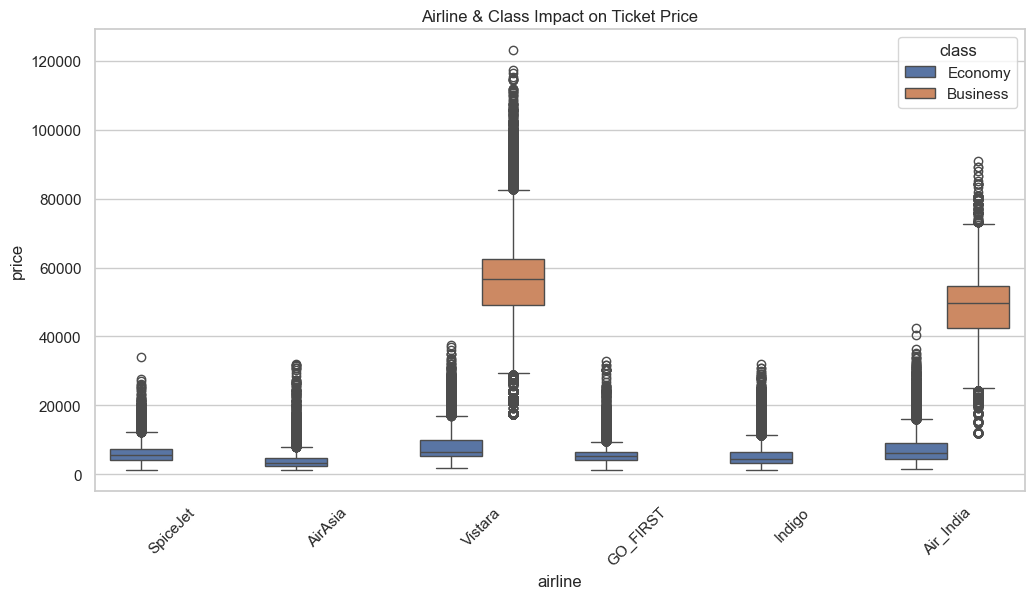

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', hue='class', data=df)
plt.xticks(rotation=45)
plt.title("Airline & Class Impact on Ticket Price")
plt.show()


In [56]:
df['price_category'] = pd.cut(
    df['price'],
    bins=[0,5000,10000,20000,50000],
    labels=['Low','Medium','High','Premium']
)

df['price_category'].value_counts()
    

price_category
Medium     92264
Low        81390
Premium    35446
High       31695
Name: count, dtype: int64

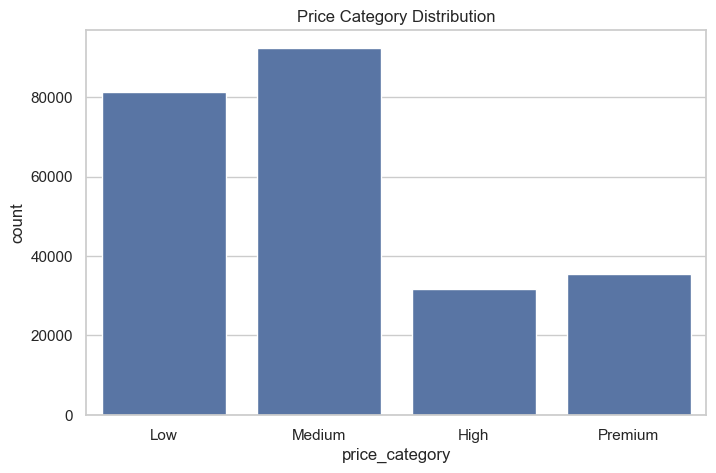

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x='price_category', data=df)
plt.title("Price Category Distribution")
plt.show()

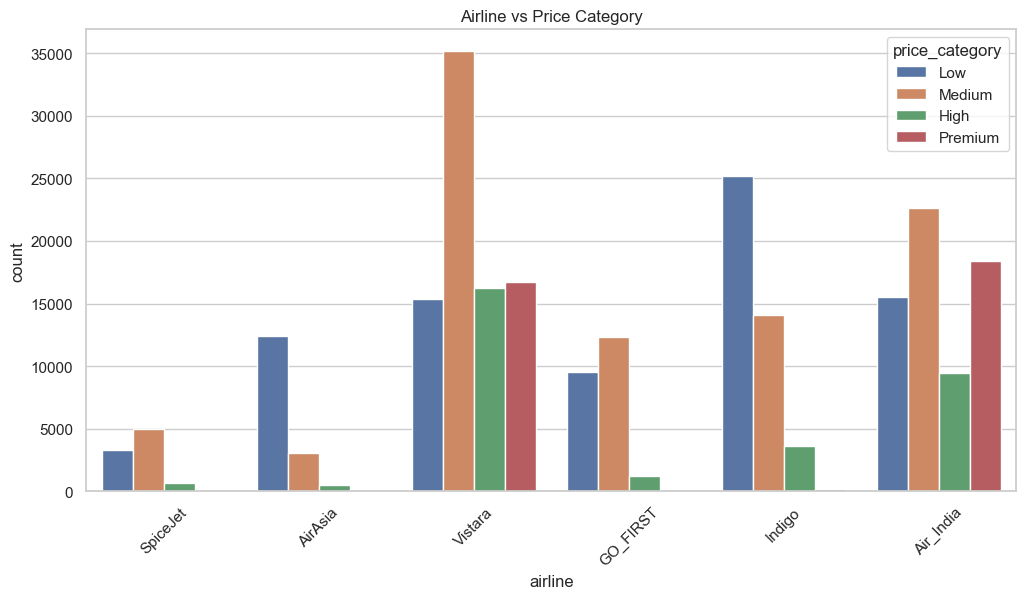

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='airline', hue='price_category', data=df)
plt.xticks(rotation=45)
plt.title("Airline vs Price Category")
plt.show()


In [63]:
percentile_95 = np.percentile(df['price'], 95)
print("95th Percentile Price:", percentile_95)

95th Percentile Price: 63277.0


In [65]:
outliners = df[df['price'] > percentile_95]
outlier_percentage = (len(outliers) / len(df)) * 100

print(f"Outliers above 95th percentile: {outlier_percentage:.2f}%")

Outliers above 95th percentile: 4.96%
